<a href="https://colab.research.google.com/github/nehaansiddiqua/ML_workshop/blob/main/Face_Mask_Detection_using_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_621.jpg', 'with_mask_1833.jpg', 'with_mask_552.jpg', 'with_mask_3444.jpg', 'with_mask_1171.jpg']
['with_mask_1091.jpg', 'with_mask_1201.jpg', 'with_mask_2125.jpg', 'with_mask_3377.jpg', 'with_mask_3216.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_558.jpg', 'without_mask_1827.jpg', 'without_mask_1842.jpg', 'without_mask_2885.jpg', 'without_mask_1904.jpg']
['without_mask_2413.jpg', 'without_mask_1944.jpg', 'without_mask_1350.jpg', 'without_mask_2656.jpg', 'without_mask_2208.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

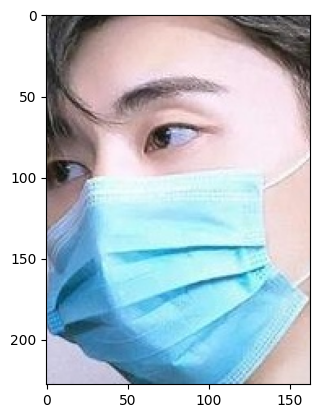

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

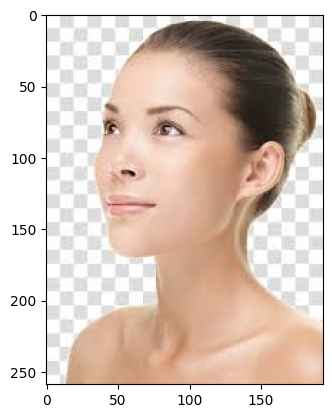

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

# Iterate over all image files in the with_mask directory
for img_file in with_mask_files:
  # Open the image file
  image = Image.open(with_mask_path + img_file)
  # Resize the image to 128x128
  image = image.resize((128,128))
  # Convert the image to RGB format
  image = image.convert('RGB')
  # Convert the image to a NumPy array
  image = np.array(image)
  # Append the NumPy array to the data list
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
# Iterate over all image files in the without_mask directory
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 70,  68,  73],
        [ 69,  67,  72],
        [ 68,  66,  71],
        ...,
        [121, 115, 149],
        [121, 115, 149],
        [121, 115, 149]],

       [[ 73,  69,  75],
        [ 72,  69,  74],
        [ 70,  68,  72],
        ...,
        [120, 114, 148],
        [120, 114, 149],
        [120, 114, 148]],

       [[ 75,  69,  74],
        [ 74,  69,  73],
        [ 72,  68,  71],
        ...,
        [117, 111, 144],
        [118, 112, 146],
        [118, 112, 146]],

       ...,

       [[ 32,  32,  32],
        [ 32,  32,  30],
        [ 29,  29,  28],
        ...,
        [ 36,  31,  37],
        [ 36,  33,  37],
        [ 34,  33,  37]],

       [[ 32,  32,  33],
        [ 31,  31,  30],
        [ 27,  27,  27],
        ...,
        [ 38,  33,  39],
        [ 36,  34,  39],
        [ 36,  34,  39]],

       [[ 30,  30,  32],
        [ 30,  30,  32],
        [ 30,  30,  30],
        ...,
        [ 36,  31,  37],
        [ 34,  32,  37],
        [ 34,  32,  37]]], dtype=uint8)
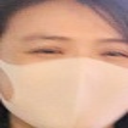

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

These lines of code are scaling the training and test data by dividing each pixel value by 255. This is a common practice in image processing to normalize the data and improve the performance of machine learning models.

array([[[ 48,  94, 133],
        [ 46,  91, 130],
        [ 43,  82, 122],
        ...,
        [158, 138, 129],
        [156, 136, 127],
        [154, 136, 127]],

       [[ 45,  89, 127],
        [ 44,  87, 125],
        [ 42,  81, 119],
        ...,
        [161, 140, 130],
        [159, 138, 128],
        [157, 138, 128]],

       [[ 40,  81, 117],
        [ 40,  79, 116],
        [ 41,  77, 114],
        ...,
        [167, 144, 132],
        [164, 142, 129],
        [163, 142, 129]],

       ...,

       [[176, 166, 168],
        [173, 164, 168],
        [163, 161, 165],
        ...,
        [162, 137, 128],
        [164, 137, 130],
        [164, 137, 130]],

       [[171, 162, 167],
        [166, 160, 166],
        [154, 154, 161],
        ...,
        [161, 136, 125],
        [163, 136, 127],
        [163, 136, 127]],

       [[168, 160, 167],
        [163, 158, 165],
        [150, 151, 160],
        ...,
        [161, 135, 124],
        [163, 136, 125],
        [163, 136, 125]]], dtype=uint8)
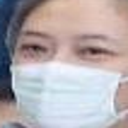

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.18823529, 0.36862745, 0.52156863],
        [0.18039216, 0.35686275, 0.50980392],
        [0.16862745, 0.32156863, 0.47843137],
        ...,
        [0.61960784, 0.54117647, 0.50588235],
        [0.61176471, 0.53333333, 0.49803922],
        [0.60392157, 0.53333333, 0.49803922]],

       [[0.17647059, 0.34901961, 0.49803922],
        [0.17254902, 0.34117647, 0.49019608],
        [0.16470588, 0.31764706, 0.46666667],
        ...,
        [0.63137255, 0.54901961, 0.50980392],
        [0.62352941, 0.54117647, 0.50196078],
        [0.61568627, 0.54117647, 0.50196078]],

       [[0.15686275, 0.31764706, 0.45882353],
        [0.15686275, 0.30980392, 0.45490196],
        [0.16078431, 0.30196078, 0.44705882],
        ...,
        [0.65490196, 0.56470588, 0.51764706],
        [0.64313725, 0.55686275, 0.50588235],
        [0.63921569, 0.55686275, 0.50588235]],

       ...,

       [[0.69019608, 0.65098039, 0.65882353],
        [0.67843137, 0.64313725, 0.65882353],
        [0.63921569, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

# First convolutional block
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

- num_of_classes: This variable specifies the number of classes that the model will predict. In this case, it is set to 2.
- model: This variable stores the Keras model object.
- keras.Sequential(): This creates a sequential model, where each layer is added sequentially.
- model.add(keras.layers.Conv2D(...)): This adds a convolutional layer to the model.
- 32: This specifies the number of filters in the convolutional layer.
- kernel_size=(3,3): This specifies the size of the filter used in the convolution.
- activation='relu': This specifies the activation function used in the convolutional layer.
- input_shape=(128,128,3): This specifies the shape of the input images.
- model.add(keras.layers.MaxPooling2D(...)): This adds a max pooling layer to the model.
- pool_size=(2,2): This specifies the size of the pooling window.
- model.add(keras.layers.Flatten()): This flattens the output of the previous layer into a single dimension
- model.add(keras.layers.Dense(128, activation='relu')): This adds a dense layer with 128 units and ReLU activation.
- model.add(keras.layers.Dropout(0.5)): This adds a dropout layer with a rate of 0.5, which means that 50% of the units in the previous layer will be randomly dropped during training.
- model.add(keras.layers.Dense(64, activation='relu')): This adds another dense layer with 64 units and ReLU activation.
- model.add(keras.layers.Dropout(0.5)): This adds another dropout layer with a rate of 0.5.
- model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')): This adds a final dense layer with a number of units equal to the number of classes and sigmoid activation.

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.5206 - acc: 0.7708 - val_loss: 0.3014 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2892 - acc: 0.8878 - val_loss: 0.2424 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2550 - acc: 0.9003 - val_loss: 0.2517 - val_acc: 0.8876
Epoch 4/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2065 - acc: 0.9178 - val_loss: 0.2236 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1813 - acc: 0.9283 - val_loss: 0.2570 - val_acc: 0.9256


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2103 - acc: 0.9232
Test Accuracy = 0.9232296347618103


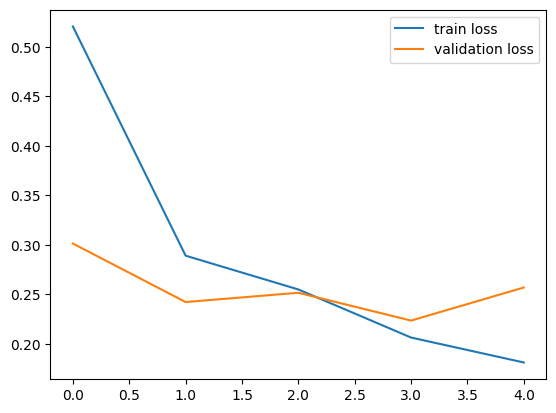

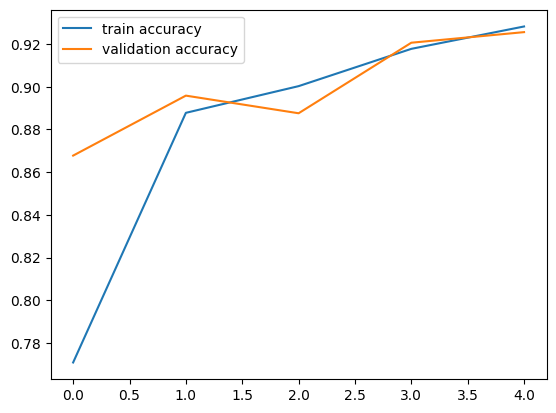

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WhatsApp Image 2024-02-23 at 2.28.10 PM (1).jpeg


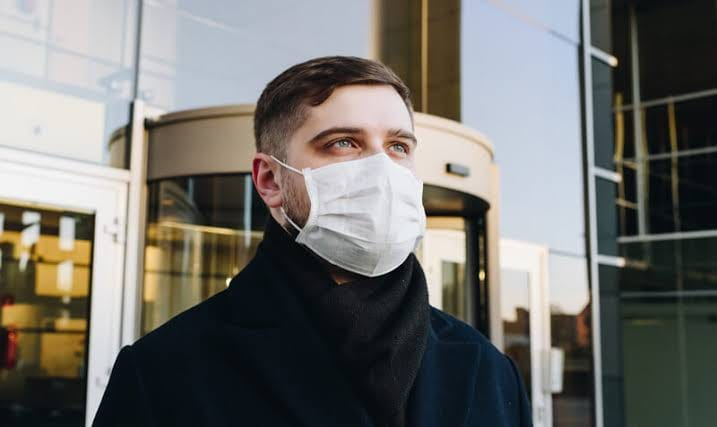

1/1 [==============================] - 0s 363ms/step
[[0.26547858 0.7631567 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WhatsApp Image 2024-02-23 at 2.28.10 PM.jpeg


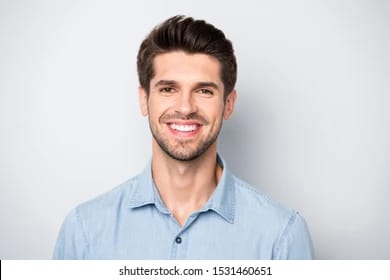

1/1 [==============================] - 0s 17ms/step
[[0.4265869  0.51102287]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')